In [22]:
import pandas
import numpy
import matplotlib.pyplot as plt
import matplotlib
import sys
import os
import pyarrow.parquet as pq
import folium
import numpy as np
import utm

/tmp/ipykernel_32492/504002386.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  souterrain_2023 = pandas.read_csv(path+'souterrain_2023.csv', sep=';')


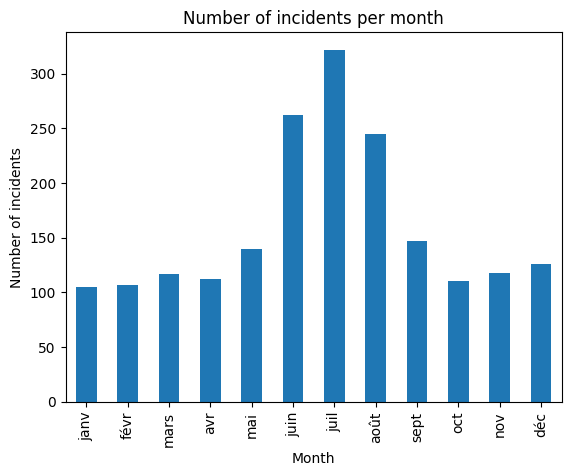

In [3]:
path = "data/"
# ouvrir les fichiers
incidents = pandas.read_csv(path+'donnees_incidents.csv', sep=';')
souterrain_2023 = pandas.read_csv(path+'souterrain_2023.csv', sep=';')
souterrain_troncons = pandas.read_csv(path+'souterrain_tronçons.csv', sep=';')
icu = pandas.read_csv(path+'icu.csv', sep=';')
temperatures = pq.read_table(path+'temperatures.parquet').to_pandas()
humidite = pq.read_table(path+'humidite.parquet').to_pandas()
nuages = pq.read_table(path+'nuages.parquet').to_pandas()

# plotly show number of incidents per month [january to december]
incidents_per_month = incidents.groupby('Mois (nom)').size()
# order months by chronological order
incidents_per_month = incidents_per_month.reindex(['janv', 'févr', 'mars', 'avr', 'mai', 'juin', 'juil', 'août', 'sept', 'oct', 'nov', 'déc'])
incidents_per_month.plot.bar()
plt.title('Number of incidents per month')
plt.xlabel('Month')
plt.ylabel('Number of incidents')
plt.show()

In [4]:
# rename column date_valid to date
temperatures = temperatures.rename(columns={'date_valid': 'date'})
print(temperatures)

                       date     valeur  longitude  latitude
0       2014-01-01 00:00:00   6.712457        0.1      44.0
1       2014-01-01 01:00:00   6.176080        0.1      44.0
2       2014-01-01 02:00:00   5.666040        0.1      44.0
3       2014-01-01 03:00:00   5.169031        0.1      44.0
4       2014-01-01 04:00:00   4.680322        0.1      44.0
...                     ...        ...        ...       ...
175195  2023-12-31 20:00:00   9.845117       -1.0      45.1
175196  2023-12-31 21:00:00  10.114893       -1.0      45.1
175197  2023-12-31 22:00:00  10.237451       -1.0      45.1
175198  2023-12-31 23:00:00  10.332361       -1.0      45.1
175199  2024-01-01 00:00:00   9.951166       -1.0      45.1

[24535000 rows x 4 columns]


In [5]:
humidite = humidite.rename(columns={'date_valid': 'date'})
print(humidite)

                       date   valeur  longitude  latitude
0       2015-01-01 01:00:00  94.7433        0.1      44.0
1       2015-01-01 02:00:00  96.6753        0.1      44.0
2       2015-01-01 03:00:00  97.8350        0.1      44.0
3       2015-01-01 04:00:00  98.3866        0.1      44.0
4       2015-01-01 05:00:00  98.5298        0.1      44.0
...                     ...      ...        ...       ...
175195  2014-12-31 20:00:00  92.9214       -1.0      45.1
175196  2014-12-31 21:00:00  94.1173       -1.0      45.1
175197  2014-12-31 22:00:00  94.9859       -1.0      45.1
175198  2014-12-31 23:00:00  95.5521       -1.0      45.1
175199  2015-01-01 00:00:00  95.5966       -1.0      45.1

[24534720 rows x 4 columns]


In [6]:
nuages = nuages.rename(columns={'date_valid': 'date'})
print(nuages)

                       date    valeur  longitude  latitude
0       2014-01-01 01:00:00  100.0000        0.1      44.0
1       2014-01-01 02:00:00   93.7500        0.1      44.0
2       2014-01-01 03:00:00   87.5000        0.1      44.0
3       2014-01-01 04:00:00   47.6562        0.1      44.0
4       2014-01-01 05:00:00   39.0625        0.1      44.0
...                     ...       ...        ...       ...
175195  2023-12-31 20:00:00   53.0000       -1.0      45.1
175196  2023-12-31 21:00:00   89.0000       -1.0      45.1
175197  2023-12-31 22:00:00  100.0000       -1.0      45.1
175198  2023-12-31 23:00:00  100.0000       -1.0      45.1
175199  2024-01-01 00:00:00  100.0000       -1.0      45.1

[24554668 rows x 4 columns]


In [7]:
# merge nuages, humidite and temperatures on date and longitude/latitude so that we have all the data in one dataframe with columns date, longitude, latitude, temperature, humidite, nuages
data = pandas.merge(temperatures, humidite, on=['date', 'longitude', 'latitude'])
data = pandas.merge(data, nuages, on=['date', 'longitude', 'latitude'])
# rename columns
data = data.rename(columns={'valeur_x': 'temperature', 'valeur_y': 'humidite', 'valeur': 'nuages'})
print(data.columns)


Index(['date', 'temperature', 'longitude', 'latitude', 'humidite', 'nuages'], dtype='object')


In [10]:
# restrict data to the 10 first different locations
data = data.groupby(['longitude', 'latitude']).head(10)
print(data.head())


                  date  temperature  longitude  latitude  humidite    nuages  \
0  2014-01-01 01:00:00     6.176080        0.1      44.0   91.4144  100.0000   
1  2014-01-01 02:00:00     5.666040        0.1      44.0   92.0131   93.7500   
2  2014-01-01 03:00:00     5.169031        0.1      44.0   92.7339   87.5000   
3  2014-01-01 04:00:00     4.680322        0.1      44.0   93.7679   47.6562   
4  2014-01-01 05:00:00     4.140131        0.1      44.0   95.0783   39.0625   

   incidents  
0          0  
1          0  
2          0  
3          0  
4          0  


In [11]:
print(incidents.head())

   Client_AI  Client_AQN  PS_HTA_AI  PS_HTA_AQN  Année  Mois Mois (nom)  \
0     466750     1389002     403426     1181581   2016     1       janv   
1     445270     1389002     327686     1181581   2016     1       janv   
2     445270     1389002     327686     1181581   2016     1       janv   
3     466750     1389002     403426     1181581   2016     1       janv   
4     445270     1389002     327686     1181581   2016     1       janv   

  Année-Mois  Semaine  jour  ...   MIS_À_JOU  \
0  2016 - 01        1     6  ...  2020/02/10   
1  2016 - 01        1    10  ...  2018/07/31   
2  2016 - 01        2    12  ...  2018/07/31   
3  2016 - 01        2    14  ...  2020/02/16   
4  2016 - 01        2    13  ...  2020/01/08   

                                      TECHNOLOGI INTENSITÉ  DÉSIGNAT1  \
0                    S6 - Synthétique NF C33-226     377.0  150 AL S6   
1                    S6 - Synthétique NF C33-226     377.0  150 AL S6   
2  PM - Papier métallisé tripolaire champ

In [15]:
# build a data frame incidents_new with the columns date, longitude, latitude, technologie
incidents_new = pandas.DataFrame(columns=['date', 'longitude', 'latitude', 'technologie', 'intensité'])

# for each incident, find the corresponding date, longitude, latitude and technologie
for index, row in incidents.iterrows():
    # find the corresponding date, longitude, latitude and technologie
    date = row["Date d'interruption"] # 42375  
    date = pandas.to_datetime(date, unit='D', origin='1899-12-30')
    longitude = row['new_x']
    latitude = row['new_y']
    technologie = row['TECHNOLOGI']
    intensite = row['INTENSITÉ']
    # add a new row to incidents_new with the corresponding date, longitude, latitude and technologie
    incidents_new = incidents_new.append({'date': date, 'longitude': longitude, 'latitude': latitude, 'technologie': technologie, 'intensité': intensite}, ignore_index=True)
print(incidents_new.head())

/tmp/ipykernel_32492/2572898766.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  incidents_new = incidents_new.append({'date': date, 'longitude': longitude, 'latitude': latitude, 'technologie': technologie, 'intensité': intensite}, ignore_index=True)
/tmp/ipykernel_32492/2572898766.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  incidents_new = incidents_new.append({'date': date, 'longitude': longitude, 'latitude': latitude, 'technologie': technologie, 'intensité': intensite}, ignore_index=True)
/tmp/ipykernel_32492/2572898766.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  incidents_new = incidents_new.append({'date': date, 'longitude': longitude, 'latitude': latitude, 'technologie': technologie, 'intensité':

        date      longitude        latitude  \
0 2016-01-06  419488.481266  6429204.143743   
1 2016-01-10  404938.896393  6444970.061507   
2 2016-01-12  377797.162623  6412129.431571   
3 2016-01-14  418418.286216  6428096.521913   
4 2016-01-13  374147.393638  6437415.454732   

                                     technologie intensité  
0                    S6 - Synthétique NF C33-226     377.0  
1                    S6 - Synthétique NF C33-226     377.0  
2  PM - Papier métallisé tripolaire champ radial     216.0  
3       PU - Papier imprégné unipolaire ss plomb     455.0  
4                    S6 - Synthétique NF C33-226     377.0  


/tmp/ipykernel_32492/2572898766.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  incidents_new = incidents_new.append({'date': date, 'longitude': longitude, 'latitude': latitude, 'technologie': technologie, 'intensité': intensite}, ignore_index=True)
/tmp/ipykernel_32492/2572898766.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  incidents_new = incidents_new.append({'date': date, 'longitude': longitude, 'latitude': latitude, 'technologie': technologie, 'intensité': intensite}, ignore_index=True)
/tmp/ipykernel_32492/2572898766.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  incidents_new = incidents_new.append({'date': date, 'longitude': longitude, 'latitude': latitude, 'technologie': technologie, 'intensité':

In [25]:
def is_in_square(longitude, latitude, center_lat, center_long, side_length):
    # Conversion des coordonnées UTM en degrés décimaux
    center_lat_deg, center_long_deg = utm.to_latlon(center_long, center_lat, 18, 'U')

    # Calcul de la distance en degrés entre les coordonnées données et le centre du carré
    distance_lat = abs(latitude - center_lat_deg)
    distance_long = abs(longitude - center_long_deg)

    # Vérification si les coordonnées sont à l'intérieur du carré
    return distance_lat <= side_length / 2 and distance_long <= side_length / 2


In [26]:
#                   date  temperature  longitude  latitude  humidite    nuages represent the  weather data for each date and each location centered on the longitude and latitude (square of 10km x 10km)
# add a column "incidents' to data that contains the number of incidents for each date and each location (contained in the square of 10km x 10km of the weather station)
data['incidents'] = 0
# for each date and each location, we count the number of incidents
for index, row in data.iterrows():
    # we get the date, longitude and latitude of the current row
    date = row['date']
    longitude = row['longitude']
    latitude = row['latitude']
    # we get the number of incidents for this date and this location (location can be different from the location of the weather station but contained in the square of 10km x 10km of the weather station) : in data location format is 0.1 44.0 and in incidents_new location format is 419488.481266  6429204.143743
    nb_incidents = incidents_new[(incidents_new['date'] == date) & is_in_square(incidents_new['longitude'], incidents_new['latitude'], latitude, longitude, 10)].shape[0]
    # we add the number of incidents to the column incidents of the current row
    data.at[index, 'incidents'] = nb_incidents
print(data.head())



OutOfRangeError: easting out of range (must be between 100,000 m and 999,999 m)

In [ ]:
# # show incidents on a map
# # create a map
# m = folium.Map(location=[45.75, 4.85], zoom_start=12)
# # add incidents
# for index, row in incidents.iterrows():
#     try :
#         folium.Marker([row['new_y'], row['new_x']], popup=row['Cause de l\'interruption']).add_to(m)
#     except :
#         print("error: ", row['new_x'], row['new_y'])
#         pass
# # add underground cables
# for index, row in souterrain_2023.iterrows():
#     try : 
#         folium.PolyLine([[row['y0'], row['x0']], [row['y1'], row['x1']]], color="red", weight=2.5, opacity=1).add_to(m)
#     except :
#         print("error: ", row['x0'], row['y0'], row['x1'], row['y1'])
#         pass


In [ ]:
print(temperatures)
# date_valid     valeur  longitude  latitude
# 0       2014-01-01 00:00:00   6.712457        0.1      44.0
# 1       2014-01-01 01:00:00   6.176080        0.1      44.0

                 date_valid     valeur  longitude  latitude
0       2014-01-01 00:00:00   6.712457        0.1      44.0
1       2014-01-01 01:00:00   6.176080        0.1      44.0
2       2014-01-01 02:00:00   5.666040        0.1      44.0
3       2014-01-01 03:00:00   5.169031        0.1      44.0
4       2014-01-01 04:00:00   4.680322        0.1      44.0
...                     ...        ...        ...       ...
175195  2023-12-31 20:00:00   9.845117       -1.0      45.1
175196  2023-12-31 21:00:00  10.114893       -1.0      45.1
175197  2023-12-31 22:00:00  10.237451       -1.0      45.1
175198  2023-12-31 23:00:00  10.332361       -1.0      45.1
175199  2024-01-01 00:00:00   9.951166       -1.0      45.1

[24535000 rows x 4 columns]


In [ ]:
# xgboost model to predict if there will be an incident or not on a given day (taking into account temperature)

# create a dataframe with the number of incidents per day (Année-Mois |  Semaine |  jour) and fill with 0 when there is no incident on a given day
incidents_per_day = incidents.groupby(['Année-Mois', 'Semaine', 'jour']).size()

incidents_per_day = incidents_per_day.reset_index()
incidents_per_day = incidents_per_day.rename(columns={0: 'Value'})
incidents_per_day['Année-Mois-jour'] = incidents_per_day['Année-Mois'] + '-' + incidents_per_day['jour'].astype(str)
incidents_per_day = incidents_per_day.drop(columns=['Année-Mois', 'Semaine', 'jour'])
incidents_per_day = incidents_per_day.set_index('Année-Mois-jour')

# add missing days with 0 value
start_date = incidents_per_day.index[0]
end_date = incidents_per_day.index[-1]
idx = pandas.date_range(start_date, end_date)
incidents_per_day.index = pandas.DatetimeIndex(incidents_per_day.index)
incidents_per_day = incidents_per_day.reindex(idx, fill_value=0)
incidents_per_day = incidents_per_day.reset_index()
incidents_per_day = incidents_per_day.rename(columns={'index': 'Année-Mois-jour'})
incidents_per_day['Année-Mois-jour'] = incidents_per_day['Année-Mois-jour'].astype(str)
incidents_per_day = incidents_per_day.set_index('Année-Mois-jour')
incidents_per_day = incidents_per_day.sort_index()
incidents_per_day.reset_index(inplace=True)

# create a dataframe with the temperature per day
temperatures_per_day = temperatures.groupby('date_valid').mean()
temperatures_per_day = temperatures_per_day.drop(columns=['longitude', 'latitude'])
temperatures_per_day.index = pandas.to_datetime(temperatures_per_day.index)
temperatures_per_day = temperatures_per_day.resample('D').mean()
temperatures_per_day = temperatures_per_day.dropna()
temperatures_per_day.reset_index(inplace=True)


In [ ]:
# incidents_per_day["seuil"] = np.where(incidents_per_day > 1, 2, np.where(incidents_per_day > 0, 1, 0))
incidents_per_day["seuil"] = incidents_per_day["Value"].apply(lambda x: 0 if x == 0 else (1 if x == 1 else 2))


In [ ]:
incidents_per_day.head()

,Année-Mois-jour,Value,seuil
0,2015-01-03,1,1
1,2015-01-04,1,1
2,2015-01-05,0,0
3,2015-01-06,0,0
4,2015-01-07,3,2


In [ ]:
# incidents_per_day["seuil"] = np.where(incidents_per_day>1, 2, np.where(incidents_per_day>0, 1, 0))
# plt.figure(figsize=(15,5))
# plt.plot(incidents_per_day["seuil"])
# plt.xticks(range(0, len(incidents_per_day["seuil"]), 365),rotation=90)
# plt.title('Number of incidents per day')
# plt.xlabel('Date')
# plt.ylabel('Number of incidents')
# plt.show()

In [ ]:
# plt.figure(figsize=(15,5))
# plt.plot(incidents_per_day)
# plt.xticks(range(0, len(incidents_per_day.index), 365),rotation=90)
# plt.title('Number of incidents per day')
# plt.xlabel('Date')
# plt.ylabel('Number of incidents')
# plt.show()

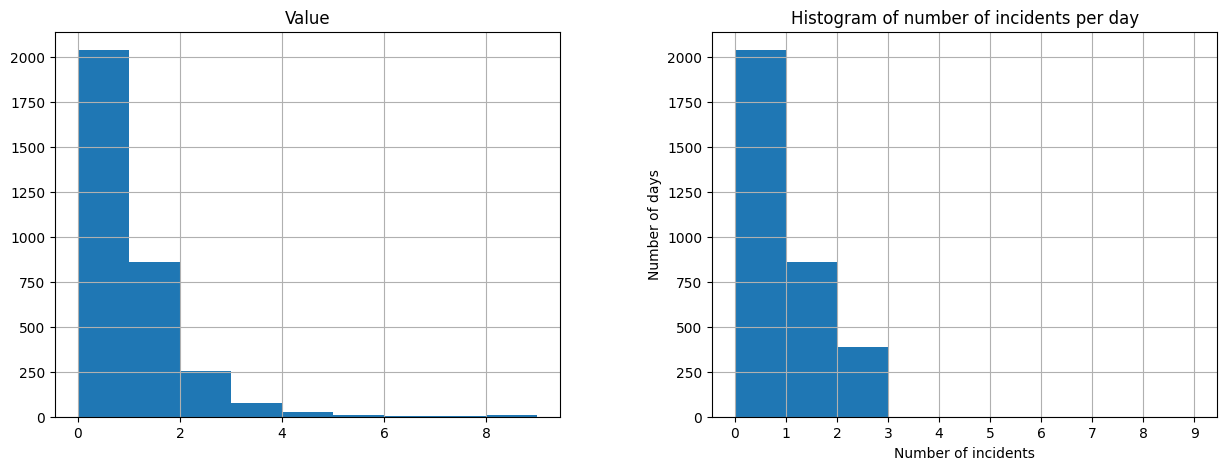

In [ ]:
#show histogram of accident

incidents_per_day.hist(bins= range(10), figsize=(15,5))
plt.title('Histogram of number of incidents per day')
plt.xlabel('Number of incidents')
plt.xticks(range(10))
plt.ylabel('Number of days')
plt.show()

In [ ]:
# import numpy as np
# # plot mean temperature per day
# plt.figure(figsize=(15,5))
# plt.plot(temperatures_per_day)
# plt.title('Mean temperature per day')
# plt.xlabel('Date')
# plt.ylabel('Mean temperature')
# plt.show()

In [ ]:
humidite.rename(columns={"date_valid": 'Année-Mois-jour',"valeur": 'humidite'}, inplace=True)
nuages.rename(columns={"date_valid": 'Année-Mois-jour',"valeur": 'nuages'}, inplace=True)



In [ ]:
# remove the H:MM:SS from the date
humidite['Année-Mois-jour'] = humidite['Année-Mois-jour'].astype(str).str[:-9]  

In [ ]:
nuages['Année-Mois-jour'] = nuages['Année-Mois-jour'].astype(str).str[:-9]


In [ ]:
humidite_per_day = humidite.groupby('Année-Mois-jour').mean()
nuages_per_day = nuages.groupby('Année-Mois-jour').mean()

In [ ]:
import pandas as pd
# Prepare dataframes so that column names match 
temperatures_per_day.rename(columns={"date_valid": 'Année-Mois-jour', 'valeur': 'temperature'}, inplace=True)
incidents_per_day.rename(columns={"Value": 'nb_incidents'}, inplace=True)

# Convert date to string for the merge
temperatures_per_day['Année-Mois-jour'] = temperatures_per_day['Année-Mois-jour'].astype(str)
# Merge the four dataframes on date column
incidents_and_temperatures_per_day = pd.merge(incidents_per_day, temperatures_per_day, on='Année-Mois-jour', how='left')
incidents_and_temperatures_per_day = pd.merge(incidents_and_temperatures_per_day, humidite_per_day, on='Année-Mois-jour', how='left')
incidents_and_temperatures_per_day = pd.merge(incidents_and_temperatures_per_day, nuages_per_day, on='Année-Mois-jour', how='left')

incidents_and_temperatures_per_day.drop(columns=['latitude_y', 'longitude_y'], inplace=True)
incidents_and_temperatures_per_day.rename(columns={"latitude_x": 'latitude', 'longitude_x': 'longitude'}, inplace=True)
incidents_and_temperatures_per_day.head()

,Année-Mois-jour,nb_incidents,seuil,temperature,humidite,longitude,latitude,nuages
0,2015-01-03,1,1,5.912898,93.768176,0.141429,44.8225,97.800992
1,2015-01-04,1,1,9.301486,95.745783,0.141429,44.8225,65.746025
2,2015-01-05,0,0,3.522026,95.898868,0.141429,44.8225,64.678316
3,2015-01-06,0,0,3.549924,96.674328,0.141429,44.8225,89.143881
4,2015-01-07,3,2,5.308433,95.563966,0.141429,44.8225,60.826242


In [ ]:
# Save incidents_and_temperatures_per_day to csv
incidents_and_temperatures_per_day.to_csv('incidents_and_temperatures_per_day.csv', index=False)